Link do vídeo no youtube https://www.youtube.com/watch?v=lYLGaLEvWto<br>
Kaggle https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Aparecer todas as colunas do dataset
pd.set_option("display.max_columns", 200)

In [3]:
dados = pd.read_csv("2004-2019.tsv", sep = '\t')

In [4]:
dados.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [5]:
dados['PRODUTO'].value_counts()

ÓLEO DIESEL         21194
GASOLINA COMUM      21194
GLP                 21186
ETANOL HIDRATADO    21102
GNV                 13034
ÓLEO DIESEL S10      9113
Name: PRODUTO, dtype: int64

In [6]:
diesel = dados[dados["PRODUTO"] == "ÓLEO DIESEL"].copy()

In [7]:
diesel.shape

(21194, 21)

In [8]:
diesel.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
43547,43547,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ÓLEO DIESEL,125,R$/l,1.447,0.031,1.350,1.490,0.198,0.021,1.249,0.012,1.2153,1.2817,0.01,5,2004
43548,43548,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ÓLEO DIESEL,373,R$/l,1.437,0.059,1.300,1.660,0.157,0.041,1.28,0.024,1.2119,1.3801,0.019,5,2004
43549,43549,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ÓLEO DIESEL,190,R$/l,1.600,0.061,1.460,1.790,0.195,0.038,1.405,0.06,1.22,1.549,0.043,5,2004
43550,43550,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ÓLEO DIESEL,157,R$/l,1.526,0.045,1.399,1.659,0.163,0.029,1.363,0.022,1.3055,1.4407,0.016,5,2004
43551,43551,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ÓLEO DIESEL,105,R$/l,1.362,0.025,1.310,1.450,0.146,0.018,1.216,0.02,1.1768,1.272,0.016,5,2004


In [9]:
# Converter as datas de strings para date

diesel['DATA INICIAL'] = pd.to_datetime(diesel['DATA INICIAL'])
diesel['DATA FINAL'] = pd.to_datetime(diesel['DATA FINAL'])

In [10]:
# Comparando a data final com a data inicial
(diesel['DATA FINAL'] - diesel['DATA INICIAL'])

43547    6 days
43548    6 days
43549    6 days
43550    6 days
43551    6 days
43552    6 days
43553    6 days
43554    6 days
43555    6 days
43556    6 days
43557    6 days
43558    6 days
43559    6 days
43560    6 days
43561    6 days
43562    6 days
43563    6 days
43564    6 days
43565    6 days
43566    6 days
43567    6 days
43568    6 days
43569    6 days
43570    6 days
43571    6 days
43572    6 days
43573    6 days
43574    6 days
43575    6 days
43576    6 days
          ...  
106575   6 days
106576   6 days
106577   6 days
106700   6 days
106701   6 days
106702   6 days
106703   6 days
106704   6 days
106705   6 days
106706   6 days
106707   6 days
106708   6 days
106709   6 days
106710   6 days
106711   6 days
106712   6 days
106713   6 days
106714   6 days
106715   6 days
106716   6 days
106717   6 days
106718   6 days
106719   6 days
106720   6 days
106721   6 days
106722   6 days
106723   6 days
106724   6 days
106725   6 days
106726   6 days
Length: 21194, dtype: ti

In [11]:
(diesel['DATA FINAL'] - diesel['DATA INICIAL']).value_counts()

6 days    21194
dtype: int64

In [12]:
diesel_treino = diesel[diesel['DATA FINAL'] < "2011-01-01"]
diesel_valid = diesel[diesel['DATA FINAL'] >= "2011-01-01"]
diesel_treino.shape, diesel_valid.shape

((9233, 21), (11961, 21))

# Baseline

In [13]:
x_treino = diesel_treino['PREÇO MÉDIO REVENDA']
y_valid = diesel_valid['PREÇO MÉDIO REVENDA']

In [14]:
baseline_treino = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)
baseline_valid = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].shift(1)

In [15]:
diesel_treino['baseline'] = baseline_treino

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
t = diesel_treino[diesel_treino['ESTADO'] == 'SAO PAULO']

In [17]:
t = t[['DATA FINAL','PREÇO MÉDIO REVENDA', 'baseline']]
t.head()

,DATA FINAL,PREÇO MÉDIO REVENDA,baseline
43570,2004-05-15,1.368,NaN
43597,2004-05-22,1.368,1.368
43624,2004-05-29,1.368,1.368
43651,2004-06-05,1.368,1.368
43678,2004-06-12,1.369,1.368


In [18]:
# Verificando o score da baseline
from sklearn.metrics import mean_squared_log_error

erro = np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()],
                              baseline_valid[baseline_valid.notnull()]))
print(erro * 100)

0.8133639513965776


# Criando o modelo de Machine Learning

In [19]:
df_x_treino = pd.DataFrame(index=diesel_treino.index)
df_x_valid = pd.DataFrame(index=diesel_valid.index)

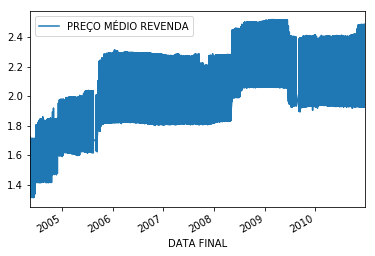

In [20]:
# Target
diesel_treino.plot(x='DATA FINAL', y='PREÇO MÉDIO REVENDA')

/home/rafael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


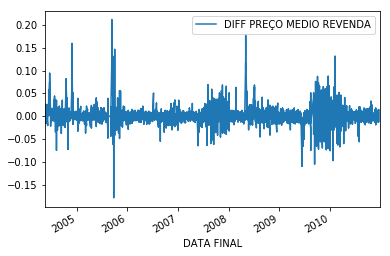

In [21]:
# Removendo as diferenças da serie e gerando uma estacionalidade

def target_diff(x):
    return x.diff().shift(-1)

diesel_treino['DIFF PREÇO MEDIO REVENDA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

diesel_treino.plot(x='DATA FINAL', y='DIFF PREÇO MEDIO REVENDA')

In [22]:
df_x_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)
df_x_valid['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].apply(target_diff)

In [23]:
df_x_treino.head()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA
43547,0.013
43548,0.001
43549,-0.003
43550,-0.002
43551,-0.003


# Sazonalidade

In [24]:
df_x_treino['MES'] = diesel_treino['DATA FINAL'].dt.month
df_x_treino['DIA'] = diesel_treino['DATA FINAL'].dt.day
df_x_treino['DIA_DA_SEMANA'] = diesel_treino['DATA FINAL'].dt.weekday
df_x_treino['DIA_DO_ANO'] = diesel_treino['DATA FINAL'].dt.dayofyear

df_x_valid['MES'] = diesel_valid['DATA FINAL'].dt.month
df_x_valid['DIA'] = diesel_valid['DATA FINAL'].dt.day
df_x_valid['DIA_DA_SEMANA'] = diesel_valid['DATA FINAL'].dt.weekday
df_x_valid['DIA_DO_ANO'] = diesel_valid['DATA FINAL'].dt.dayofyear

In [25]:
df_x_treino.head()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DA_SEMANA,DIA_DO_ANO
43547,0.013,5,15,5,136
43548,0.001,5,15,5,136
43549,-0.003,5,15,5,136
43550,-0.002,5,15,5,136
43551,-0.003,5,15,5,136


# Lag

In [26]:
df_x_treino['PRECO_MEDIO_REVENDA_ATUAL'] = diesel_treino['PREÇO MÉDIO REVENDA']
df_x_valid['PRECO_MEDIO_REVENDA_ATUAL'] = diesel_valid['PREÇO MÉDIO REVENDA']

# Diferença do Lag
## DIFF_LAG = yt-1-yt-2

In [27]:
df_x_treino['DIFF_PRECO_MEDIO_REVENDA_ATUAL'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()
df_x_valid['DIFF_PRECO_MEDIO_REVENDA_ATUAL'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].diff()

# Média Móvel

In [28]:
roll = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean()
roll.head()

ESTADO       
ACRE    43560       NaN
        43587       NaN
        43614       NaN
        43641    1.7165
        43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [29]:
roll.reset_index(level=0, drop=True).head()

43560       NaN
43587       NaN
43614       NaN
43641    1.7165
43668    1.7140
Name: PREÇO MÉDIO REVENDA, dtype: float64

In [30]:
df_x_treino['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANS'] = diesel_treino.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)
df_x_valid['MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANS'] = diesel_valid.groupby(['ESTADO'])['PREÇO MÉDIO REVENDA'].rolling(4).mean().reset_index(level=0, drop=True)

# Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
df_x_treino.head()

,DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA,MES,DIA,DIA_DA_SEMANA,DIA_DO_ANO,PRECO_MEDIO_REVENDA_ATUAL,DIFF_PRECO_MEDIO_REVENDA_ATUAL,MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANS
43547,0.013,5,15,5,136,1.447,NaN,NaN
43548,0.001,5,15,5,136,1.437,NaN,NaN
43549,-0.003,5,15,5,136,1.600,NaN,NaN
43550,-0.002,5,15,5,136,1.526,NaN,NaN
43551,-0.003,5,15,5,136,1.362,NaN,NaN


In [33]:
df_x_treino = df_x_treino.dropna()
df_x_valid = df_x_valid.dropna()

In [34]:
xtr, ytr = df_x_treino.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_x_treino['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']
xval, yval = df_x_valid.drop(['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA'], axis=1), df_x_valid['DIFF_PRECO_MEDIO_REVENDA_PROXIMA_SEMANA']

xtr.isnull().mean()

MES                                         0.0
DIA                                         0.0
DIA_DA_SEMANA                               0.0
DIA_DO_ANO                                  0.0
PRECO_MEDIO_REVENDA_ATUAL                   0.0
DIFF_PRECO_MEDIO_REVENDA_ATUAL              0.0
MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANS    0.0
dtype: float64

In [37]:
mdl = RandomForestRegressor(n_jobs=-1, random_state=0 ,n_estimators=500)
mdl.fit(xtr, ytr)
p = mdl.predict(xval)

In [38]:
p_final = xval['PRECO_MEDIO_REVENDA_ATUAL'] + p
yval_final = xval['PRECO_MEDIO_REVENDA_ATUAL'] + yval

np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100

0.8344905526219556

In [40]:
var_menor_erro = None
valor_menor_erro = 1000.

for var in xtr.columns:
    mdl = RandomForestRegressor(n_jobs=-1, random_state=0 ,n_estimators=500)
    mdl.fit(xtr[[var]], ytr)
    p = mdl.predict(xval[[var]])
    
    p_final = xval['PRECO_MEDIO_REVENDA_ATUAL'] + p
    yval_final = xval['PRECO_MEDIO_REVENDA_ATUAL'] + yval
    
    erro = np.sqrt(mean_squared_log_error(yval_final, p_final)) * 100
    
    print("Variaveis: {} - Erro:{:.4f}\n".format(var, erro))
    
    if erro < valor_menor_erro:
        var_menor_erro = var
        valor_menor_erro = erro

print("------------------------------------------------------------")
print("Melhor variável: {} - Erro:{:.4f}\n".format(var_menor_erro, valor_menor_erro))

Variaveis: MES - Erro:0.8092

Variaveis: DIA - Erro:0.8194

Variaveis: DIA_DA_SEMANA - Erro:0.8115

Variaveis: DIA_DO_ANO - Erro:0.8924

Variaveis: PRECO_MEDIO_REVENDA_ATUAL - Erro:0.8271

Variaveis: DIFF_PRECO_MEDIO_REVENDA_ATUAL - Erro:0.8345

Variaveis: MEDIA_MOVEL_PRECO_MEDIO_REVENDA_4_SEMANS - Erro:0.8409

------------------------------------------------------------
Melhor variável: MES - Erro:0.8092

